# Hoja de Trabajo 3

#### Mineria de Datos
#### Maria Marta Ramirez Gil - 21342
#### Gustavo Andres Gonzalez - 21438

-------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar los datos
data = pd.read_csv('medicina.csv')

## EDA

In [3]:
# Explorar las primeras filas de los datos
print("Primeras filas de los datos:")
print(data.head())

# Información general sobre el conjunto de datos
print("\nInformación general sobre el conjunto de datos:")
print(data.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe())

# Verificar si hay valores nulos o faltantes
print("\nValores nulos o faltantes:")
print(data.isnull().sum())

Primeras filas de los datos:
   Age Sex      BP Cholesterol  Na_to_K   Drug      Height      Weight  \
0   23   F    HIGH        HIGH   25.355  drugY  167.494363  107.766413   
1   47   M     LOW        HIGH   13.093  drugC  171.866737   43.332084   
2   47   M     LOW        HIGH   10.114  drugC  178.318211   72.814734   
3   28   F  NORMAL        HIGH    7.798  drugX  180.900052   56.813694   
4   61   F     LOW        HIGH   18.043  drugY  167.937282   81.902153   

   Exercise  HealthyEating  
0       0.0            0.0  
1       1.0            0.0  
2       1.0            1.0  
3       1.0            0.0  
4       1.0            0.0  

Información general sobre el conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            500 non-null    int64  
 1   Sex            500 non-null    object 
 2   BP             50

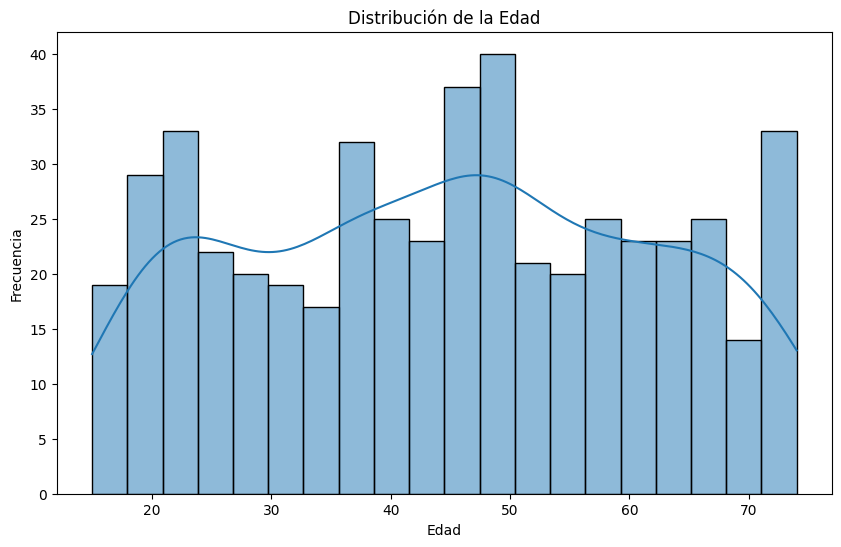

Estadísticas de la Edad:
count    500.000000
mean      44.610000
std       17.004005
min       15.000000
25%       30.750000
50%       45.000000
75%       58.000000
max       74.000000
Name: Age, dtype: float64


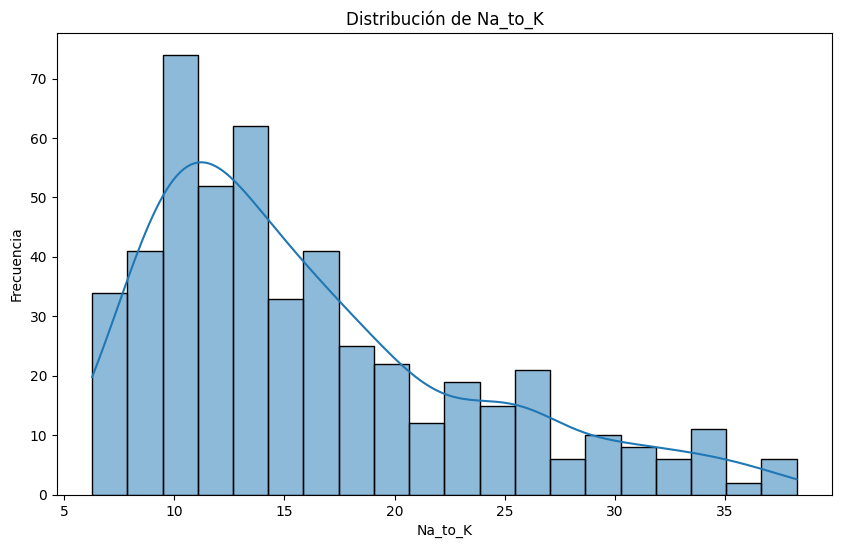


Estadísticas de Na_to_K:
count    500.000000
mean      16.151824
std        7.332291
min        6.269000
25%       10.514250
50%       13.972000
75%       19.480750
max       38.247000
Name: Na_to_K, dtype: float64


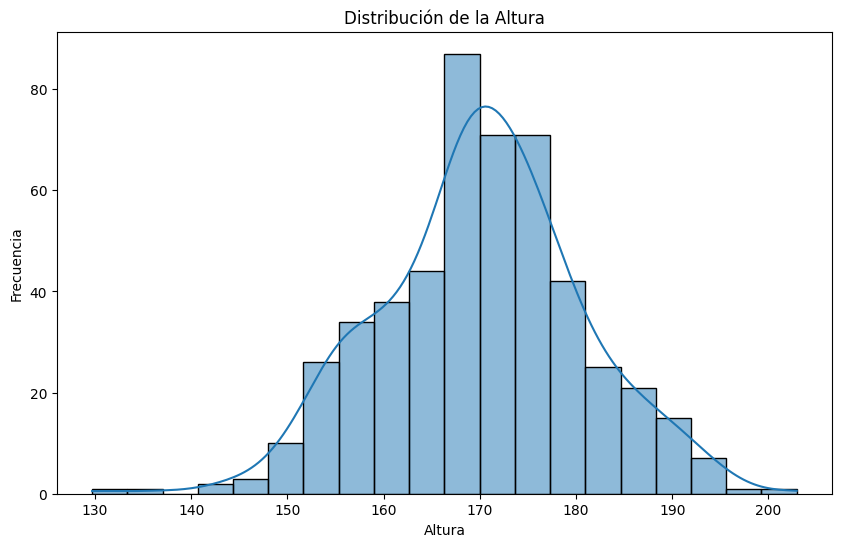


Estadísticas de la Altura:
count    500.000000
mean     170.109039
std       10.496840
min      129.691685
25%      163.539613
50%      170.192129
75%      176.798684
max      202.933444
Name: Height, dtype: float64


In [4]:
# Visualización de la distribución de las variables numéricas
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()
print("Estadísticas de la Edad:")
print(data['Age'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(data['Na_to_K'], bins=20, kde=True)
plt.title('Distribución de Na_to_K')
plt.xlabel('Na_to_K')
plt.ylabel('Frecuencia')
plt.show()
print("\nEstadísticas de Na_to_K:")
print(data['Na_to_K'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(data['Height'], bins=20, kde=True)
plt.title('Distribución de la Altura')
plt.xlabel('Altura')
plt.ylabel('Frecuencia')
plt.show()
print("\nEstadísticas de la Altura:")
print(data['Height'].describe())

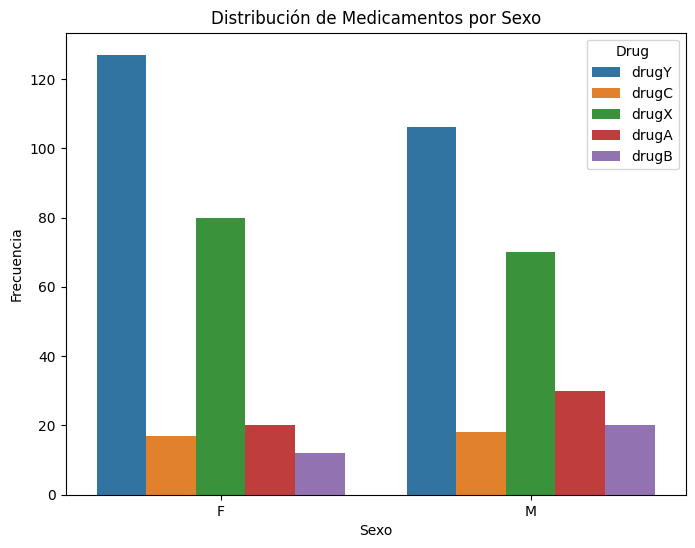

Distribución de Medicamentos por Sexo:
F    256
M    244
Name: Sex, dtype: int64


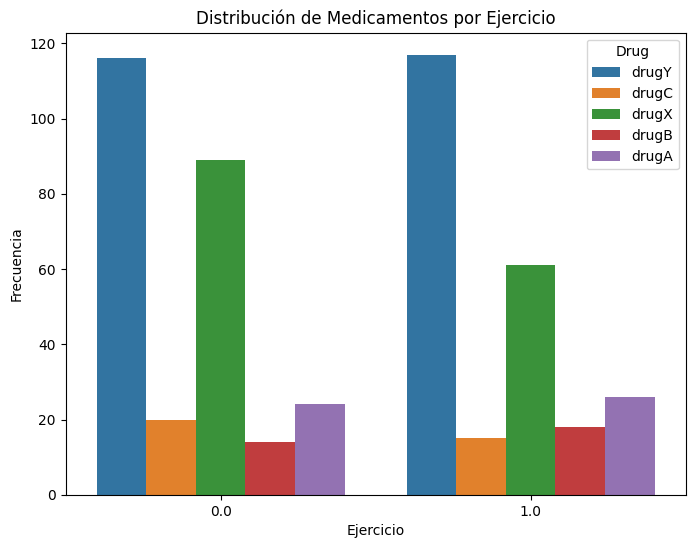


Distribución de Medicamentos por Ejercicio:
0.0    263
1.0    237
Name: Exercise, dtype: int64


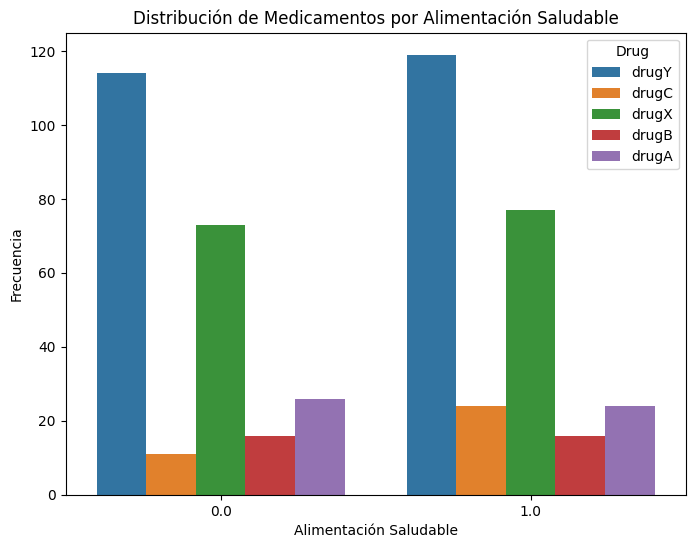


Distribución de Medicamentos por Alimentación Saludable:
1.0    260
0.0    240
Name: HealthyEating, dtype: int64


In [5]:
# Visualización de la distribución de las variables categóricas
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=data, hue='Drug')
plt.title('Distribución de Medicamentos por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.show()
print("Distribución de Medicamentos por Sexo:")
print(data['Sex'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x='Exercise', data=data, hue='Drug')
plt.title('Distribución de Medicamentos por Ejercicio')
plt.xlabel('Ejercicio')
plt.ylabel('Frecuencia')
plt.show()
print("\nDistribución de Medicamentos por Ejercicio:")
print(data['Exercise'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x='HealthyEating', data=data, hue='Drug')
plt.title('Distribución de Medicamentos por Alimentación Saludable')
plt.xlabel('Alimentación Saludable')
plt.ylabel('Frecuencia')
plt.show()
print("\nDistribución de Medicamentos por Alimentación Saludable:")
print(data['HealthyEating'].value_counts())


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Copiar el DataFrame original para evitar modificar los datos originales
processed_data = data.copy()

# Encoding para la columna 'Sex'
sex_mapping = {'F': 1, 'M': 0}
processed_data['Sex'] = processed_data['Sex'].map(sex_mapping)

# Encoding para la columna 'BP' usando one-hot encoding
bp_encoded = pd.get_dummies(processed_data['BP'], prefix='BP')
processed_data = pd.concat([processed_data, bp_encoded], axis=1)
processed_data.drop('BP', axis=1, inplace=True)

# Encoding para la columna 'Cholesterol'
cholesterol_mapping = {'HIGH': 1, 'NORMAL': 0}
processed_data['Cholesterol'] = processed_data['Cholesterol'].map(cholesterol_mapping)

# Encoding para la columna 'Drug' usando one-hot encoding
drug_encoded = pd.get_dummies(processed_data['Drug'], prefix='Drug')
processed_data = pd.concat([processed_data, drug_encoded], axis=1)
processed_data.drop('Drug', axis=1, inplace=True)

# Convertir las columnas binarias en valores numéricos
for column in processed_data.columns:
    if 'BP_' in column or 'Drug_' in column:
        processed_data[column] = processed_data[column].astype(int)

# Normalizar las características numéricas (Age, Na_to_K, Height, Weight)
scaler = MinMaxScaler()
columns_to_normalize = ['Age', 'Na_to_K', 'Height', 'Weight']
processed_data[columns_to_normalize] = scaler.fit_transform(processed_data[columns_to_normalize])

# Verificar los primeros registros del DataFrame procesado
print(processed_data.head())

# Guardar el DataFrame procesado en un archivo CSV
processed_data.to_csv('datos_medicos_procesados.csv', index=False)

        Age  Sex  Cholesterol   Na_to_K    Height    Weight  Exercise  \
0  0.135593    1            1  0.596848  0.516136  0.932136       0.0   
1  0.542373    0            1  0.213397  0.575833  0.155031       1.0   
2  0.542373    0            1  0.120239  0.663918  0.510604       1.0   
3  0.220339    1            1  0.047814  0.699169  0.317625       1.0   
4  0.779661    1            1  0.368191  0.522183  0.620202       1.0   

   HealthyEating  BP_HIGH  BP_LOW  BP_NORMAL  Drug_drugA  Drug_drugB  \
0            0.0        1       0          0           0           0   
1            0.0        0       1          0           0           0   
2            1.0        0       1          0           0           0   
3            0.0        0       0          1           0           0   
4            0.0        0       1          0           0           0   

   Drug_drugC  Drug_drugX  Drug_drugY  
0           0           0           1  
1           1           0           0  
2       

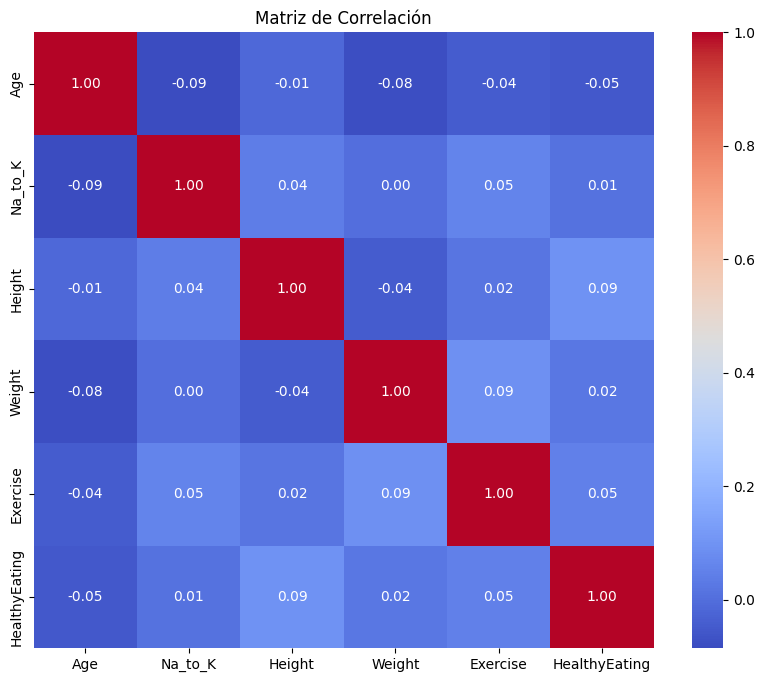

In [7]:
# Seleccionar solo las variables numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Correlación entre las variables numéricas
plt.figure(figsize=(10, 8))
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


### Informe EDA

Distribución de la Edad:
- La edad de los pacientes oscila entre 15 y 74 años, con una media de aproximadamente 45 años.
- La mayoría de los pacientes tienen entre 30 y 60 años, como lo indica el rango intercuartil.
- La edad parece estar distribuida de manera relativamente uniforme, sin sesgo evidente.

Distribución de Na_to_K:
- El ratio de Na_to_K varía entre 6.269 y 38.247, con una media de aproximadamente 16.15.
- La distribución de Na_to_K muestra una dispersión considerable, con algunos valores extremos en el lado superior.

Distribución de la Altura:
- La altura de los pacientes varía entre 129.69 y 202.93 centímetros, con una media de alrededor de 170.11.
- La distribución de la altura parece seguir una distribución normal, con la mayoría de los pacientes teniendo alturas cercanas a la media.

Distribución de Medicamentos por Sexo:
- Hay 256 pacientes femeninas y 244 pacientes masculinos en el conjunto de datos.
- La diferencia en la distribución de medicamentos entre hombres y mujeres podría ser un factor importante en la predicción de qué medicamento sería más efectivo para cada grupo.

Distribución de Medicamentos por Ejercicio:
- Hay 263 pacientes que no hacen ejercicio y 237 que sí lo hacen.
- La relación entre el ejercicio y la eficacia del medicamento podría ser una variable significativa en el modelo de predicción.

Distribución de Medicamentos por Alimentación Saludable:
- Hay 260 pacientes que tienen una alimentación saludable y 240 que no la tienen.
- La relación entre la alimentación saludable y la eficacia del medicamento también podría influir en el resultado del tratamiento.


## Clustering

In [8]:
processed_data.head()

,Age,Sex,Cholesterol,Na_to_K,Height,Weight,Exercise,HealthyEating,BP_HIGH,BP_LOW,BP_NORMAL,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX,Drug_drugY
0,0.135593,1,1,0.596848,0.516136,0.932136,0.0,0.0,1,0,0,0,0,0,0,1
1,0.542373,0,1,0.213397,0.575833,0.155031,1.0,0.0,0,1,0,0,0,1,0,0
2,0.542373,0,1,0.120239,0.663918,0.510604,1.0,1.0,0,1,0,0,0,1,0,0
3,0.220339,1,1,0.047814,0.699169,0.317625,1.0,0.0,0,0,1,0,0,0,1,0
4,0.779661,1,1,0.368191,0.522183,0.620202,1.0,0.0,0,1,0,0,0,0,0,1


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.9 is maybe too old for this OS.
  warnings.warn(


Puntuación de silueta promedio: 0.21157701928982925

Centroides de los clusters:
        Age       Sex  Cholesterol   Na_to_K    Height    Weight  Exercise  \
0  0.462906  0.540984     0.497268  0.363882  0.553876  0.484040  0.519126   
1  0.553537  0.455090     0.455090  0.312868  0.549819  0.464082  0.473054   
2  0.491864  0.540000     0.573333  0.237907  0.551588  0.487073  0.420000   

   HealthyEating       BP_HIGH        BP_LOW     BP_NORMAL  
0       0.502732  1.000000e+00  4.440892e-16 -3.330669e-16  
1       0.538922 -4.996004e-16  1.000000e+00 -2.775558e-16  
2       0.520000 -4.440892e-16  4.996004e-16  1.000000e+00  


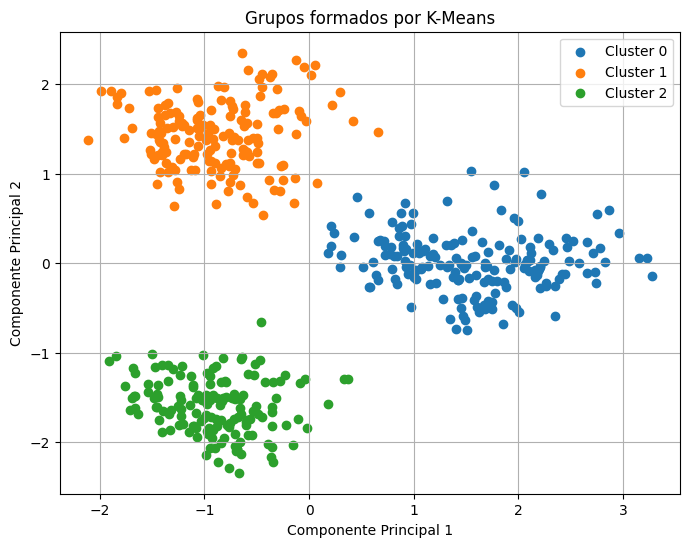

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 2. Cargar y preprocesar los datos
data = pd.read_csv('datos_medicos_procesados.csv')  
X = data.drop(['Drug_drugA', 'Drug_drugB', 'Drug_drugC', 'Drug_drugX', 'Drug_drugY'], axis=1)  # Excluir las columnas de los medicamentos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Realizar el clustering utilizando K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# 4. Evaluar el rendimiento del clustering
silhouette_avg = silhouette_score(X_scaled, data['Cluster'])
print("Puntuación de silueta promedio:", silhouette_avg)

# Mostrar los centroides de los clusters
centroides = scaler.inverse_transform(kmeans.cluster_centers_)
centroides_df = pd.DataFrame(centroides, columns=X.columns)
print("\nCentroides de los clusters:")
print(centroides_df)


# Reducir la dimensionalidad de los datos a 2 dimensiones utilizando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Graficar los grupos formados por K-Means
plt.figure(figsize=(8, 6))
for cluster in range(3): 
    plt.scatter(X_pca[data['Cluster'] == cluster, 0], X_pca[data['Cluster'] == cluster, 1], label=f'Cluster {cluster}')
plt.title('Grupos formados por K-Means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

Cluster 0:
- Edad (Age): Relativamente mayor en comparación con los otros grupos.
- Sexo (Sex): Equitativamente distribuido entre ambos sexos.
- Colesterol: Moderado.
- Ratio de Sodio a Potasio (Na_to_K): Moderado.
- Altura (Height): Moderada.
- Peso (Weight): Moderado.
- Ejercicio (Exercise): Moderado.
- Alimentación saludable (HealthyEating): Moderada.
- Presión arterial alta (BP_HIGH): Alta.
- Presión arterial baja (BP_LOW): Cercana a cero.
- Presión arterial normal (BP_NORMAL): Cercana a cero.

Cluster 1:
- Edad (Age): Relativamente mayor en comparación con el Cluster 2 y menor que el Cluster 0.
- Sexo (Sex): Distribución ligeramente sesgada hacia un sexo.
- Colesterol: Moderado.
- Ratio de Sodio a Potasio (Na_to_K): Moderado.
- Altura (Height): Moderada.
- Peso (Weight): Moderado.
- Ejercicio (Exercise): Moderado.
- Alimentación saludable (HealthyEating): Moderada.
- Presión arterial alta (BP_HIGH): Cercana a cero.
- Presión arterial baja (BP_LOW): Alta.
- Presión arterial normal (BP_NORMAL): Cercana a cero.

Cluster 2:
- Edad (Age): Relativamente menor en comparación con los otros grupos.
- Sexo (Sex): Equitativamente distribuido entre ambos sexos.
- Colesterol: Moderado a alto.
- Ratio de Sodio a Potasio (Na_to_K): Bajo.
- Altura (Height): Moderada.
- Peso (Weight): Moderado.
- Ejercicio (Exercise): Bajo.
- Alimentación saludable (HealthyEating): Moderada a baja.
- Presión arterial alta (BP_HIGH): Cercana a cero.
- Presión arterial baja (BP_LOW): Cercana a cero.
- Presión arterial normal (BP_NORMAL): Alta.


En base a estos datos podemos decir para cada cluster:

Cluster 0: "Grupo de pacientes con presión arterial alta y edad avanzada"
Descripción: Este grupo está caracterizado por pacientes mayores con una presión arterial alta. Aunque la presión arterial es alta, otras características como el colesterol, la altura, el peso y el ejercicio son moderados. Es posible que estos pacientes necesiten un enfoque de tratamiento específico debido a su edad y presión arterial elevada.

Cluster 1: "Grupo de pacientes con presión arterial baja y edad intermedia"
Descripción: Este grupo incluye pacientes de edad intermedia con una presión arterial más baja en comparación con otros grupos. Aunque la presión arterial es baja, otras características como el colesterol, la altura, el peso y el ejercicio son moderados. Es posible que estos pacientes requieran una atención especial para mantener su presión arterial en niveles saludables.

Cluster 2: "Grupo de pacientes jóvenes con riesgo cardiovascular moderado"
Descripción: Este grupo está compuesto por pacientes más jóvenes con un riesgo cardiovascular moderado. Tienen un colesterol moderado a alto y un bajo nivel de ejercicio y alimentación saludable en comparación con otros grupos. Aunque la presión arterial es normal, otras características indican un riesgo potencial de problemas cardiovasculares en el futuro. Es posible que estos pacientes necesiten intervenciones preventivas para reducir su riesgo cardiovascular.

## Entrenamiento y Prueba

In [10]:
processed_data.head()

,Age,Sex,Cholesterol,Na_to_K,Height,Weight,Exercise,HealthyEating,BP_HIGH,BP_LOW,BP_NORMAL,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX,Drug_drugY
0,0.135593,1,1,0.596848,0.516136,0.932136,0.0,0.0,1,0,0,0,0,0,0,1
1,0.542373,0,1,0.213397,0.575833,0.155031,1.0,0.0,0,1,0,0,0,1,0,0
2,0.542373,0,1,0.120239,0.663918,0.510604,1.0,1.0,0,1,0,0,0,1,0,0
3,0.220339,1,1,0.047814,0.699169,0.317625,1.0,0.0,0,0,1,0,0,0,1,0
4,0.779661,1,1,0.368191,0.522183,0.620202,1.0,0.0,0,1,0,0,0,0,0,1


In [11]:
from sklearn.model_selection import train_test_split

# Cargar los datos
data = pd.read_csv('datos_medicos_procesados.csv')

# Dividir características (X) y etiquetas (y)
X = data.drop(columns=['Drug_drugA', 'Drug_drugB', 'Drug_drugC', 'Drug_drugX', 'Drug_drugY'])
y = data[['Drug_drugA', 'Drug_drugB', 'Drug_drugC', 'Drug_drugX', 'Drug_drugY']]

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Mostrar la distribución de clases en los conjuntos de entrenamiento y prueba
print("Distribución de clases en conjunto de entrenamiento:")
print(y_train.sum() / len(y_train))
print("\nDistribución de clases en conjunto de prueba:")
print(y_test.sum() / len(y_test))

Distribución de clases en conjunto de entrenamiento:
Drug_drugA    0.100
Drug_drugB    0.065
Drug_drugC    0.070
Drug_drugX    0.300
Drug_drugY    0.465
dtype: float64

Distribución de clases en conjunto de prueba:
Drug_drugA    0.10
Drug_drugB    0.06
Drug_drugC    0.07
Drug_drugX    0.30
Drug_drugY    0.47
dtype: float64


In [12]:
# Guardar los conjuntos de entrenamiento para mejor orden
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

El criterio utilizado para crear los conjuntos de entrenamiento y prueba fue el siguiente:

Número de filas de cada conjunto: Se dividió el conjunto de datos en un 80% para entrenamiento y un 20% para prueba. Esta proporción es comúnmente utilizada en la práctica y permite disponer de una cantidad adecuada de datos para entrenar el modelo mientras se reserva una porción significativa para evaluar su rendimiento.

Estratificación: Se utilizó la estratificación al dividir los datos en conjuntos de entrenamiento y prueba. Esto garantiza que la proporción de cada clase se mantenga en ambos conjuntos, evitando así sesgos que podrían surgir si la distribución de clases no fuera equilibrada entre ellos. Esta estrategia es especialmente importante en problemas de clasificación donde las clases no están uniformemente distribuidas en el conjunto de datos.

Balanceado: Aunque no se realizó un balanceo explícito de las clases (por ejemplo, mediante técnicas de sobremuestreo o submuestreo), se observa que las clases no están muy desequilibradas en el conjunto de datos original. Sin embargo, se optó por mantener la estratificación para garantizar una distribución equitativa de clases en los conjuntos de entrenamiento y prueba.

## Arbol de Clasificacion

### Con conjunto de entrenamiento

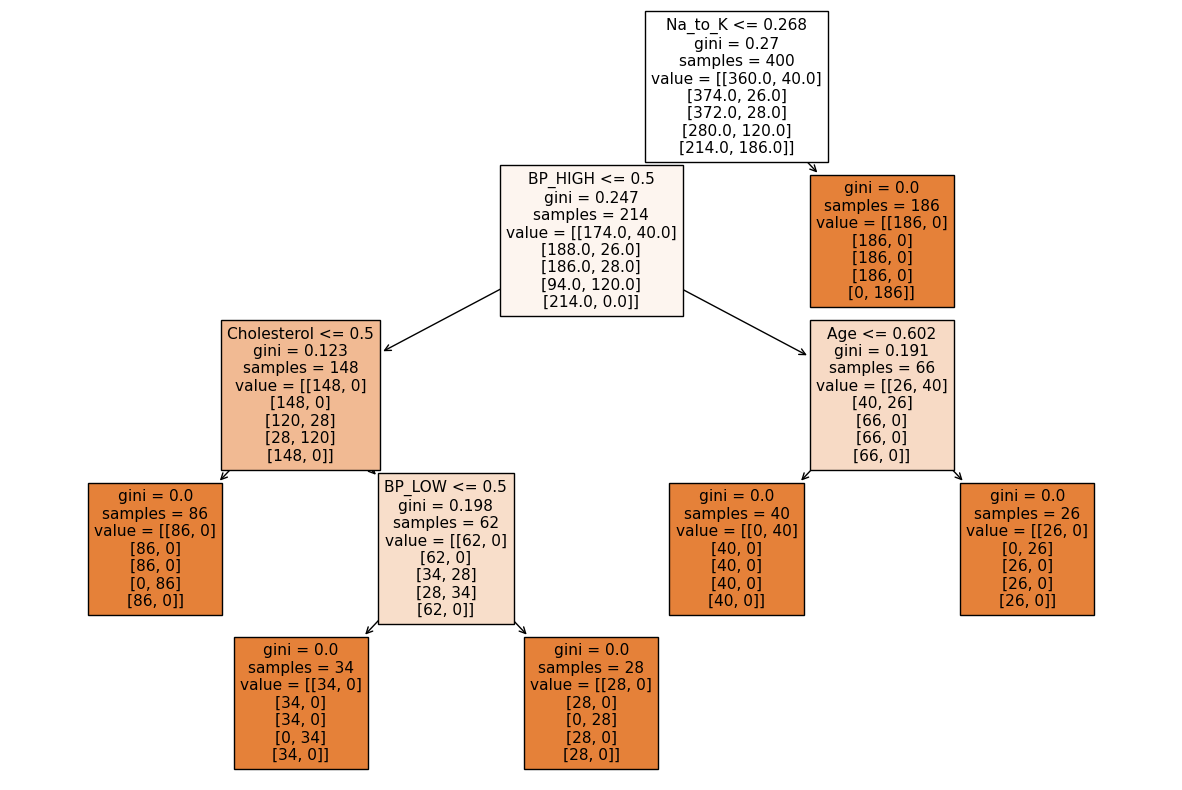

Reporte de clasificación sobre el conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00       120
           4       1.00      1.00      1.00       186

   micro avg       1.00      1.00      1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400
 samples avg       1.00      1.00      1.00       400



In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

# Fijar la semilla aleatoria para reproducibilidad
random_seed = 42

# Cargar los conjuntos de entrenamiento y prueba
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

# Inicializar el clasificador de árbol de decisión
clf = DecisionTreeClassifier(random_state=random_seed)

# Entrenar el modelo con el conjunto de entrenamiento
clf.fit(X_train, y_train)

classes = ['Drug_A', 'Drug_B', 'Drug_C', 'Drug_X', 'Drug_Y']
features = X_train.columns
# Visualizar el árbol de decisión
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=features, class_names=classes)
plt.show()

# Predicción sobre el conjunto de entrenamiento
y_pred_train = clf.predict(X_train)

# Reporte de clasificación sobre el conjunto de entrenamiento
print("Reporte de clasificación sobre el conjunto de entrenamiento:")
print(classification_report(y_train, y_pred_train))


Los resultados muestran que el árbol de clasificación entrenado ha logrado una clasificación perfecta en el conjunto de entrenamiento. Sin embargo, es importante tener en cuenta que estos resultados pueden ser demasiado buenos para ser verdaderos y podrían indicar un posible sobreajuste del modelo al conjunto de entrenamiento. Para evaluar de manera más completa el rendimiento del modelo, es esencial probarlo en un conjunto de datos independiente, como el conjunto de prueba.

### Con conjunto de prueba

In [14]:
# Cargar los conjuntos de prueba
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

# Hacer predicciones sobre el conjunto de prueba utilizando el modelo entrenado
y_pred_test = clf.predict(X_test)

# Reporte de clasificación sobre el conjunto de prueba
print("Reporte de clasificación sobre el conjunto de prueba:")
print(classification_report(y_test, y_pred_test))

Reporte de clasificación sobre el conjunto de prueba:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        47

   micro avg       1.00      1.00      1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100
 samples avg       1.00      1.00      1.00       100



# Desempeño del árbol de regresión

In [40]:
#imports
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [19]:
# Predicción sobre el conjunto de entrenamiento y de prueba
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print('Accuracy en Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy en Test: ', accuracy_score(y_pred_test, y_test))

Accuracy en Train:  1.0
Accuracy en Test:  1.0


In [35]:

def confusion_matrix_plot(y_pred, y_true, classes, tipo):
    print(tipo, "Matriz de Confusión")

    # Assuming y_true and y_pred are in the multilabel indicator format
    multilabel_cm = multilabel_confusion_matrix(y_true, y_pred)

    # Plot confusion matrix for each class
    for i, cm in enumerate(multilabel_cm):
        plt.figure()
        sns.heatmap(cm, annot=True, yticklabels=[0, 1], xticklabels=[0, 1], cmap='Blues', fmt='g')
        plt.title(f"Confusion Matrix for Class {classes[i]}")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()

Test Matriz de Confusión


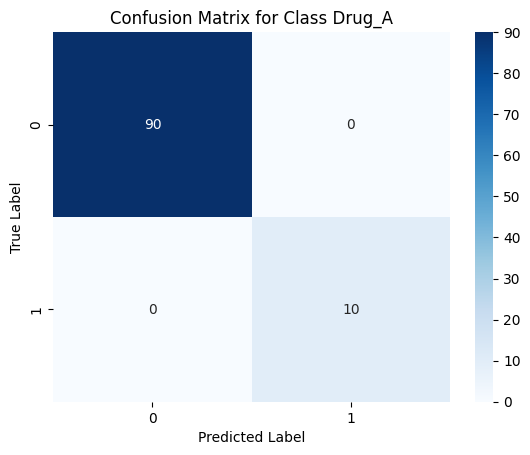

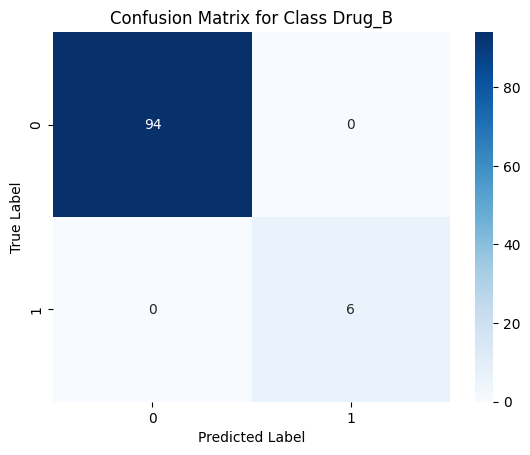

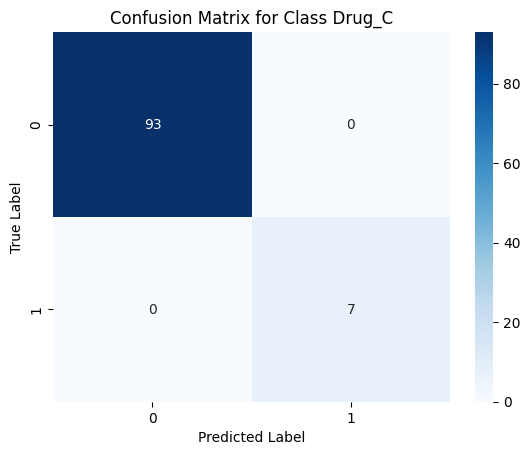

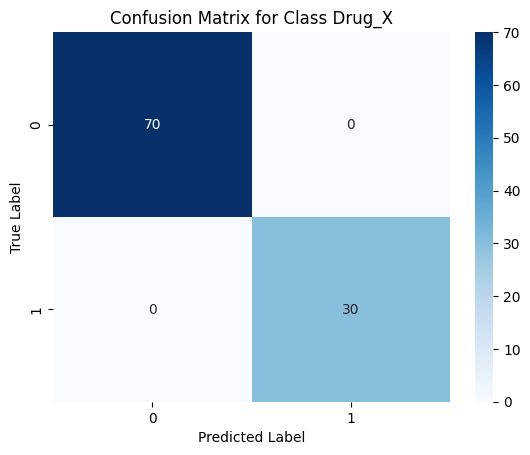

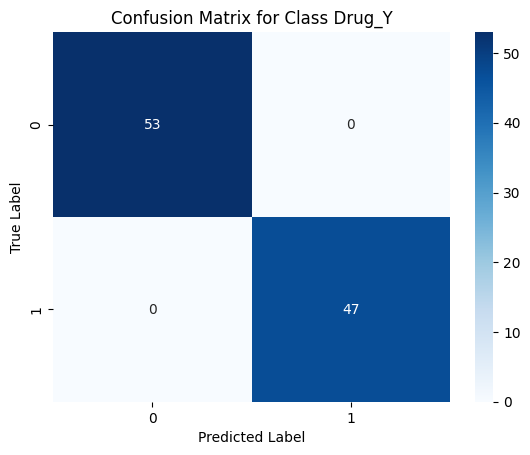

In [36]:
confusion_matrix_plot(y_pred_test, y_test, classes, 'Test')

Claramente podemos ver que existe un sobreajuste, ya que tiene un accuracy de 100% para ambos los datos de entrenamiento y de prueba.

## Pre-Poda

In [59]:
clf = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=2, max_depth=3, random_state=random_seed)  # Adjust as needed
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [60]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print('Accuracy en Train: ', accuracy_score(y_train_pred, y_train))
print('Accuracy en Test: ', accuracy_score(y_test_pred, y_test))

Accuracy en Train:  0.93
Accuracy en Test:  0.93


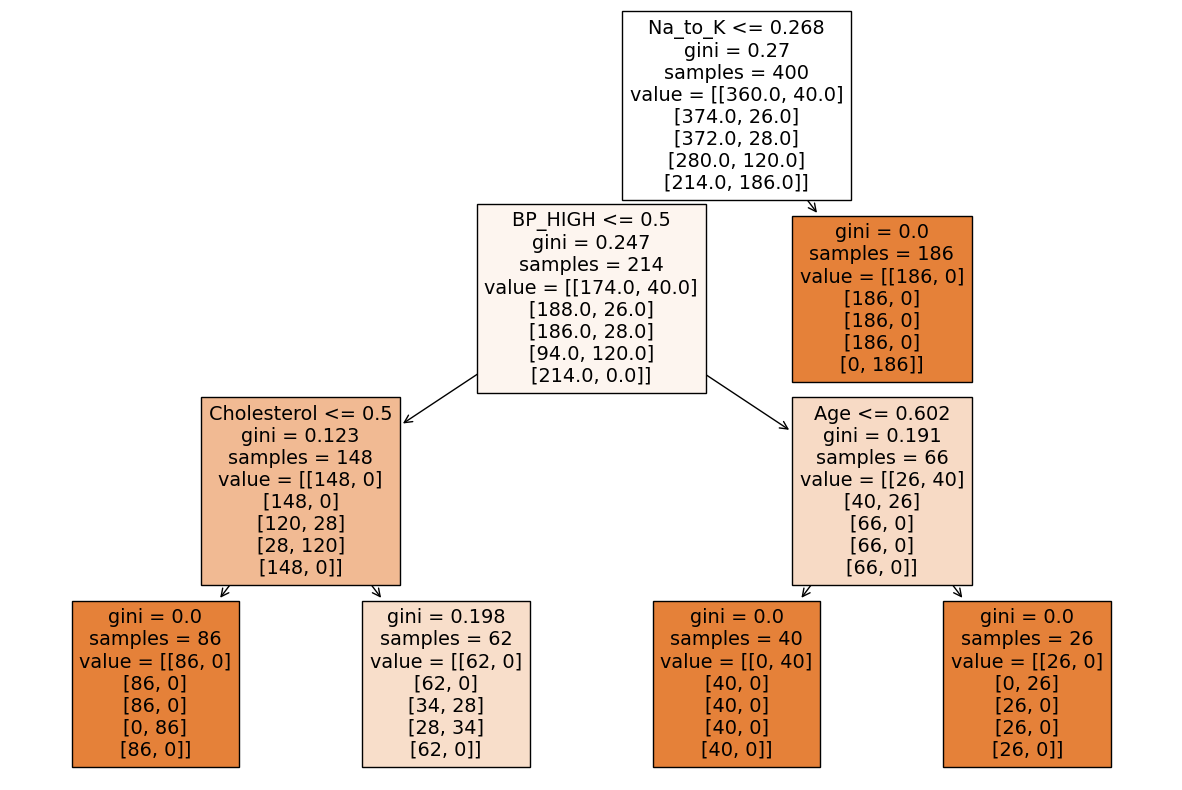

In [61]:
classes = ['Drug_A', 'Drug_B', 'Drug_C', 'Drug_X', 'Drug_Y']
features = X_train.columns
# Visualizar el árbol de decisión
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=features, class_names=classes)
plt.show()

## Post-poda

In [48]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.0227027  0.03151515 0.05549066 0.13744879]


In [49]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

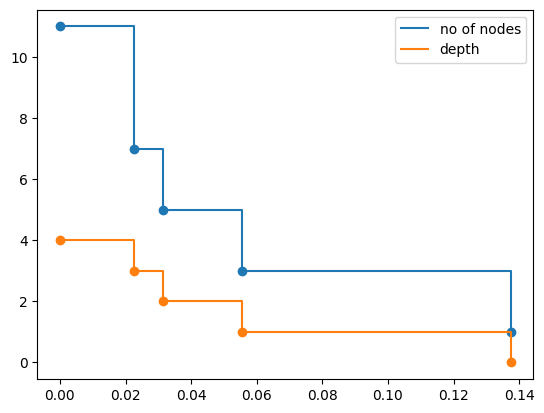

In [50]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

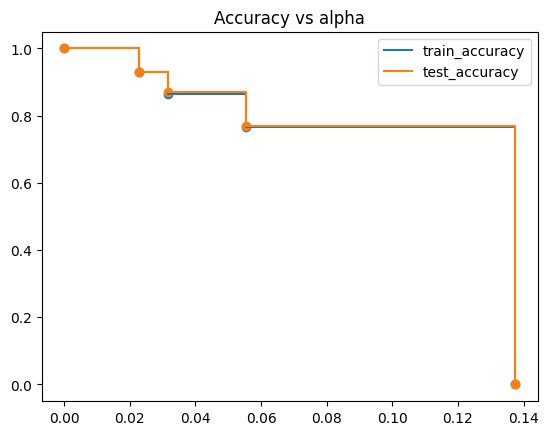

In [52]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train score  0.865
Test score  0.87
Train Matriz de Confusión


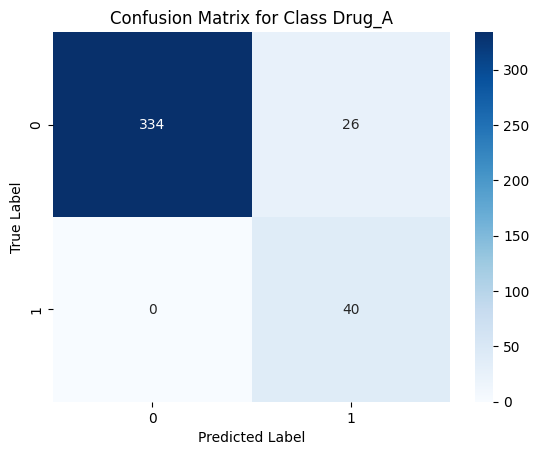

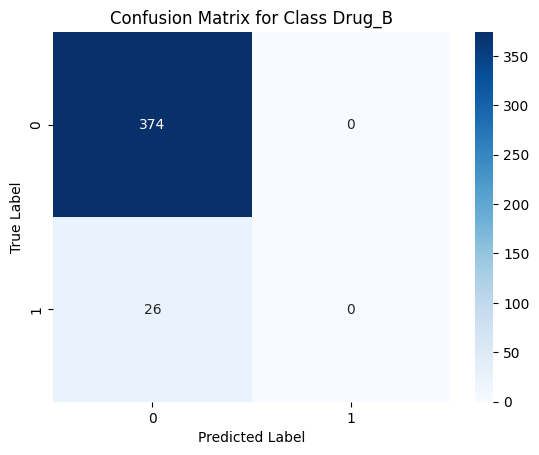

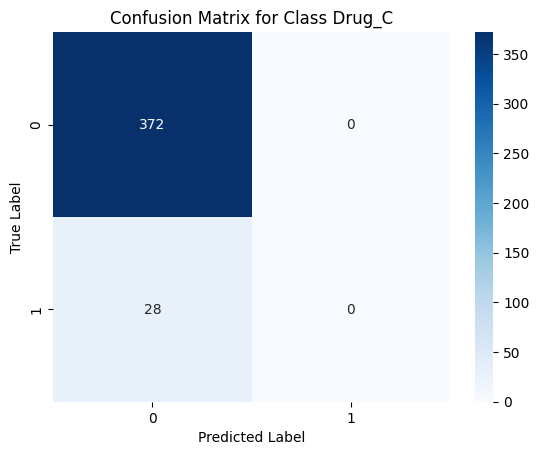

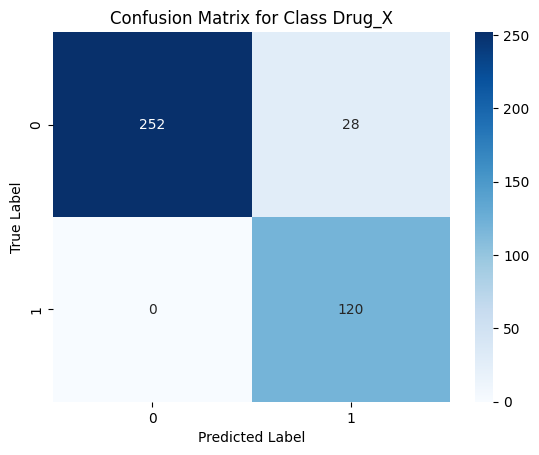

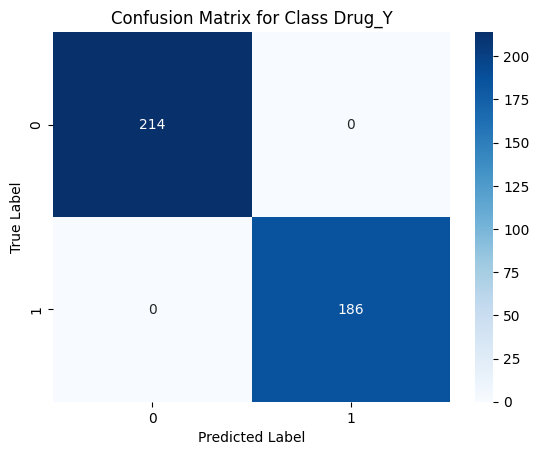

In [57]:
clf_ = DecisionTreeClassifier(random_state=42,ccp_alpha=0.0327027)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print('Train score ',accuracy_score(y_train_pred,y_train))
print('Test score ', accuracy_score(y_test_pred,y_test))
confusion_matrix_plot(y_train_pred,y_train, classes, 'Train')

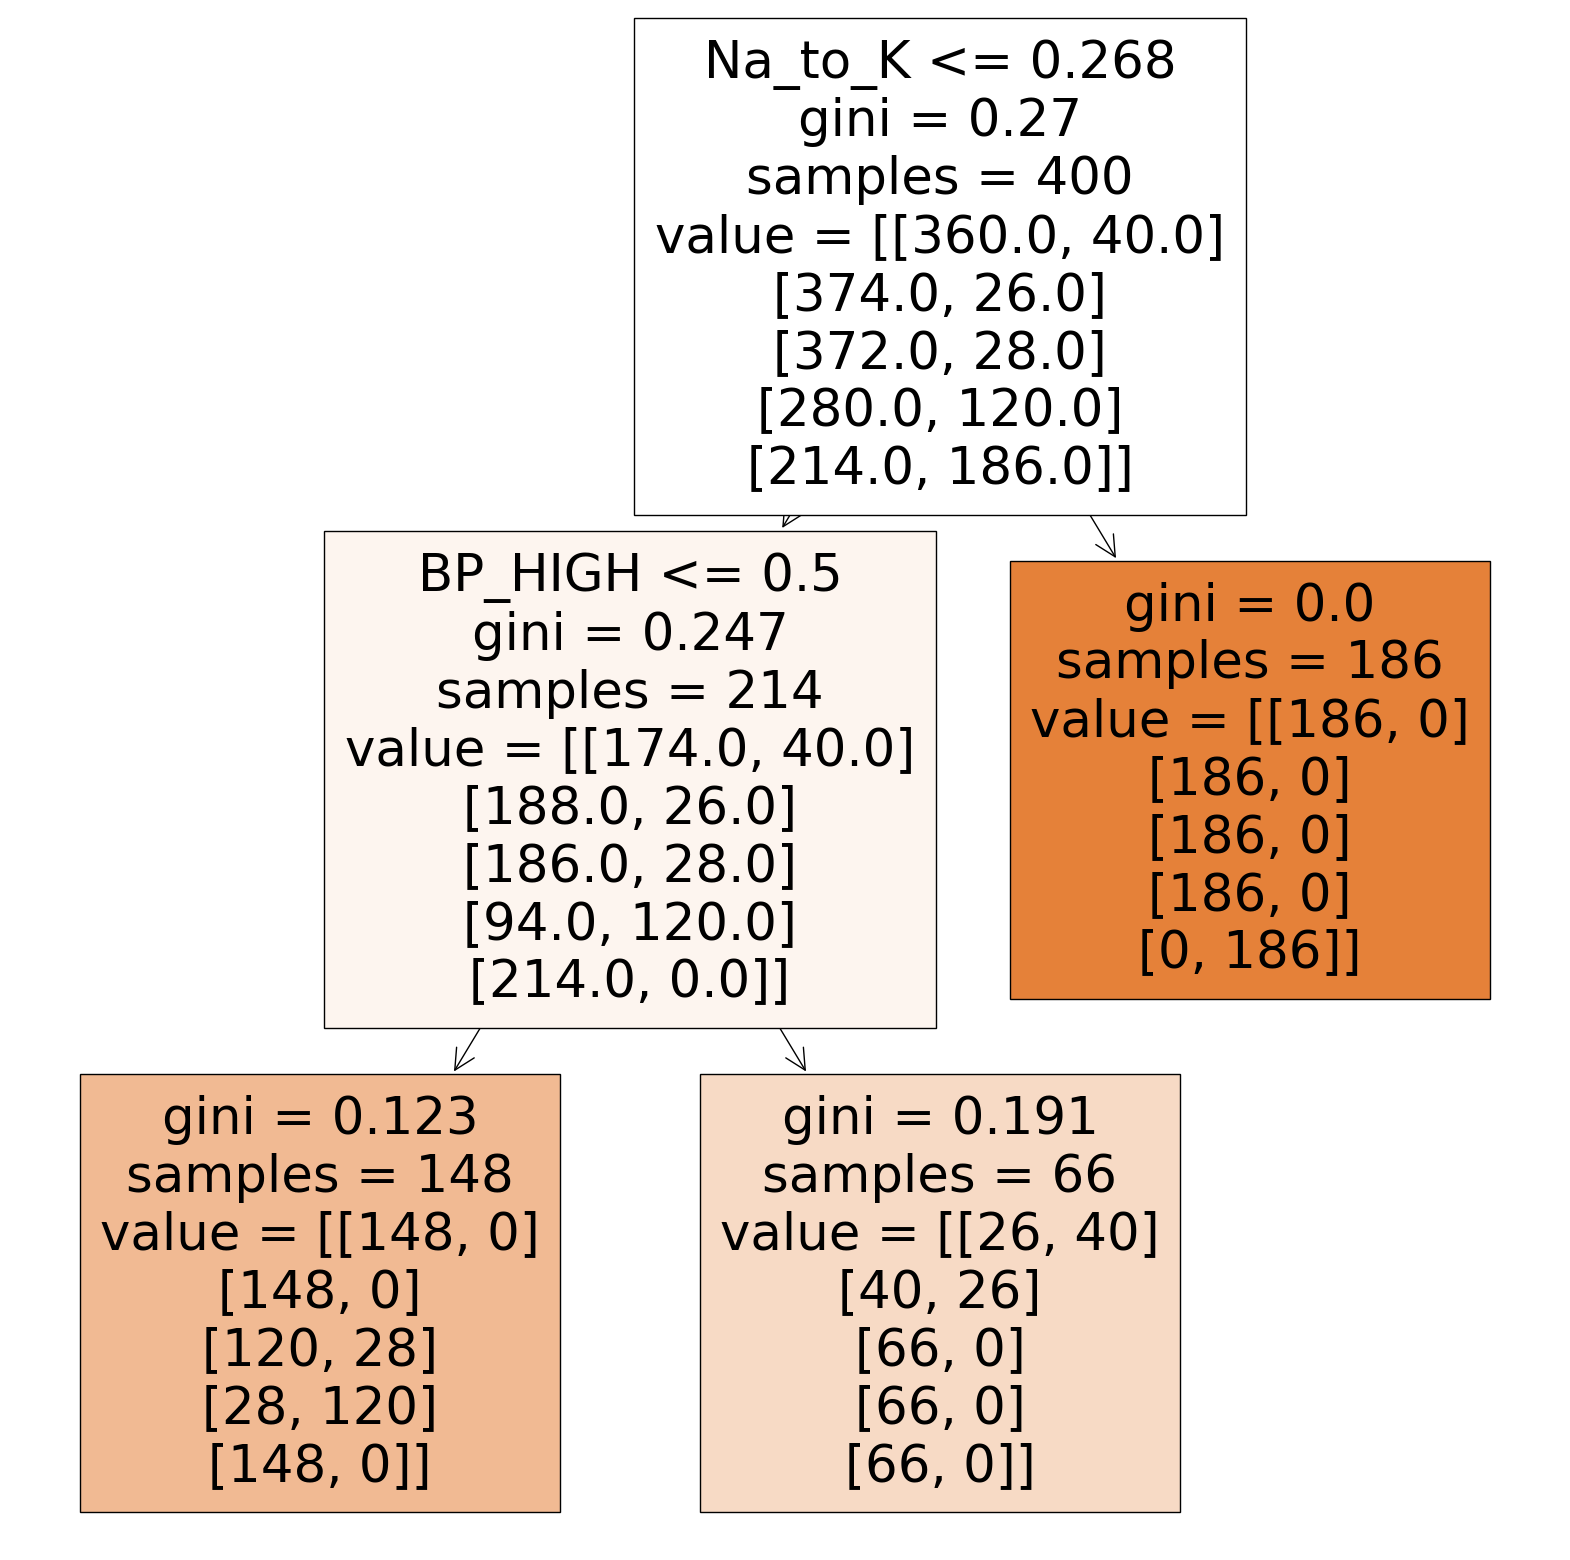

In [58]:
plt.figure(figsize=(20,20))
plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

## Conclusiones de la poda

Inicialmente, identificamos un caso de sobreajuste en nuestro árbol de decisión. En la primera etapa, implementamos una pre-poda con el objetivo de reducir nuestra precisión y eliminar el sobreajuste. Se logró disminuir la precisión a 0.9 tanto en los datos de prueba como en los de entrenamiento.

Posteriormente, mediante la postpoda, conseguimos reducir aún más la precisión, alcanzando un nivel de 0.8. Este ajuste adicional contribuyó a mitigar el sobreajuste inicial observado en el modelo de árbol de decisión.